In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [5]:
def convexe(L):
    fig,ax = plt.subplots(1,1,figsize = (4,4))
    Num = len(L)
    X = []
    Y = []
    Boundary = []
    Theta = []
    for each in L:
        ax.scatter(each[0], each[1], marker='o', c='red')
        X.append(each[0])
        Y.append(each[1])
    
    k = Y.index(min(Y))
    origin = L[k]
    Boundary.append(origin)
    
    for i in range(0,Num):
        if (L[i][1]-origin[1])**2+(L[i][0]-origin[0])**2 != 0:
            theta = np.arctan2(L[i][1]-origin[1],L[i][0]-origin[0])
            r = np.sqrt((L[i][1]-origin[1])**2+(L[i][0]-origin[0])**2)
            Theta.append({'numero':i,'angle': theta,'distance': r})
    Theta = sorted(Theta,key=lambda x: (x['angle'], x['distance']))
    
    for each in Theta:
        Boundary.append(L[int(each['numero'])])
        print(Boundary)
        
        while len(Boundary) > 2 and (Boundary[-2][0]-Boundary[-1][0])*(Boundary[-3][1]-Boundary[-2][1])-(Boundary[-3][0]-Boundary[-2][0])*(Boundary[-2][1]-Boundary[-1][1]) >= 0:
            Boundary.pop(-2)
    
    long = len(Boundary)
    for i in range(0,long):
        T = np.linspace(0,1,10000)
        x = Boundary[np.mod(i,long)][0]*T + Boundary[np.mod(i+1,long)][0]*(1-T)
        y = Boundary[np.mod(i,long)][1]*T + Boundary[np.mod(i+1,long)][1]*(1-T)
        ax.plot(x, y, 'k')
   
    return Boundary
    

<IPython.core.display.Javascript object>


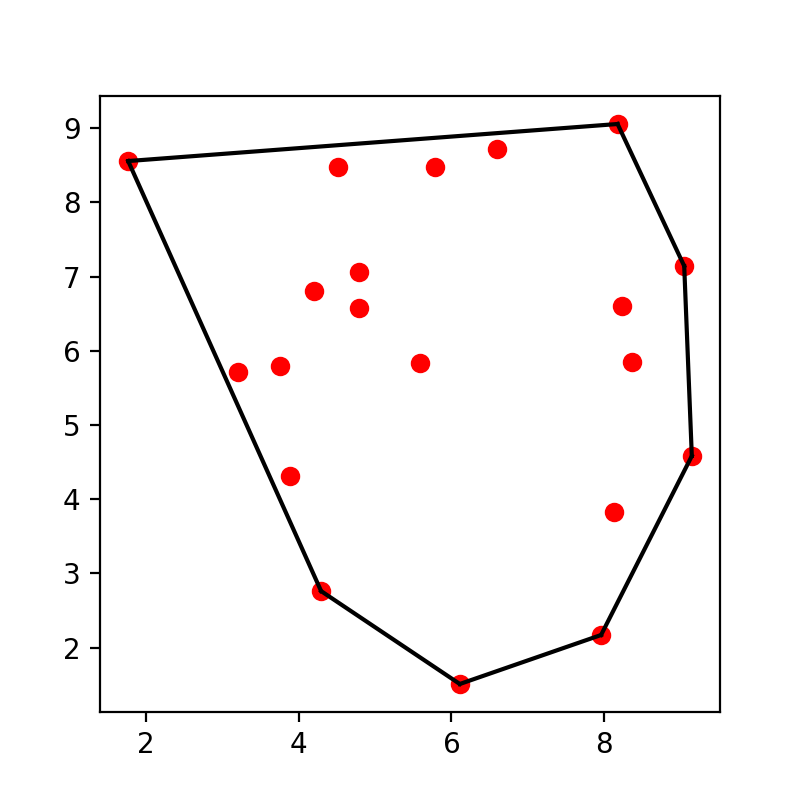

[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666]]
[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666], [9.150177006117232, 4.582042208864118]]
[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666], [9.150177006117232, 4.582042208864118], [8.13249539698687, 3.83308436304255]]
[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666], [9.150177006117232, 4.582042208864118], [8.13249539698687, 3.83308436304255], [9.050473282183422, 7.142091978523948]]
[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666], [9.150177006117232, 4.582042208864118], [9.050473282183422, 7.142091978523948], [8.369757151840052, 5.851933929925296]]
[[6.1107843648032345, 1.50898964427963], [7.961378417986962, 2.1695546470689666], [9.150177006117232, 4.582042208864118], [9.050473282183422, 7.142091978523948], [8.369757151840052, 5.851933929925296], [8.237583829700457, 6.6071806612

[[6.1107843648032345, 1.50898964427963],
 [7.961378417986962, 2.1695546470689666],
 [9.150177006117232, 4.582042208864118],
 [9.050473282183422, 7.142091978523948],
 [8.177685103177668, 9.056232556404332],
 [1.7664829133401705, 8.556819441592118],
 [4.2938955274694965, 2.761239319909136]]

In [11]:
#Trouver 20 points aleatoires dans un intervalle 10*10
convexe([[np.random.uniform(1,10) for j in range(2)] for i in range(20)])

<IPython.core.display.Javascript object>


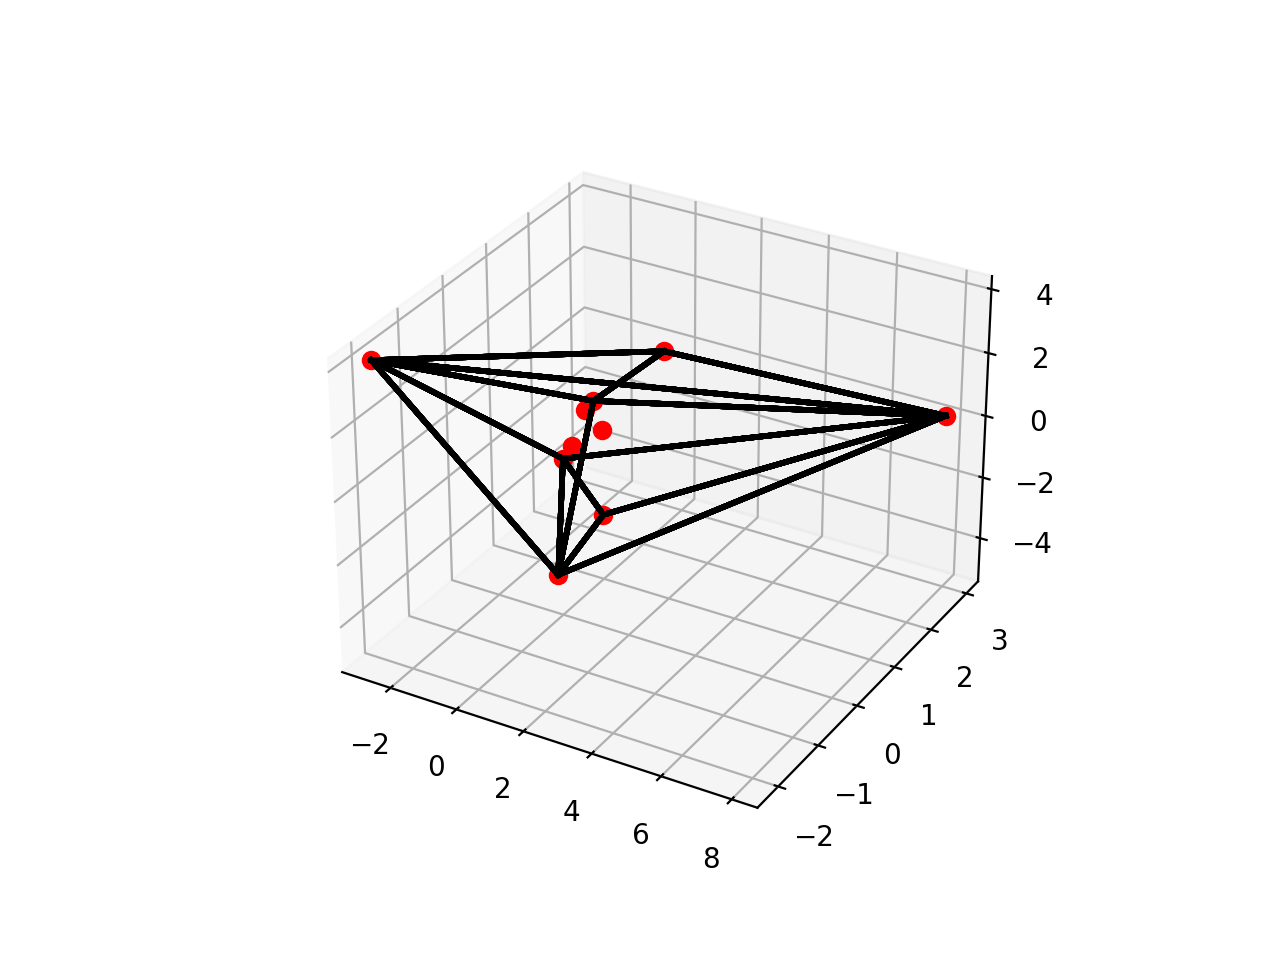

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
def Point3D (n,rmax,c):
    Lx,Ly,Lz=[],[],[]
    for k in range (n):
        r=rmax*rd.random()/(1+c*rd.random())
        ang1=2*np.pi*rd.random()
        ang2=2*np.pi*rd.random()
        x,y,z=r*np.sin(ang2)*np.sin(ang1),r*np.sin(ang2)*np.cos(ang1),r*np.cos(ang2)
        Lx.append(x)
        Ly.append(y)
        Lz.append(z)
    return (Lx,Ly,Lz)

def pv (v1,v2): # Produit vectoriel
    (a,b,c)=v1
    (d,e,f)=v2
    return (b*f-e*c,c*d-a*f,a*e-d*b)
    
def ps (v1,v2): # Produit scalaire
    (a,b,c)=v1
    (d,e,f)=v2
    return(a*d+b*e+c*f)

def Conv3D (X):
    Lx,Ly,Lz=X[0],X[1],X[2]
    E=[]
    for a in range (len(Lx)):
        for b in range (len(Lx)):
            if b != a:
                for c in range (len(Lx)):
                    if c != a and c != b:
                        oka,okb=True,True
                        u1=(Lx[a]-Lx[b],Ly[a]-Ly[b],Lz[a]-Lz[b])
                        u2=(Lx[a]-Lx[c],Ly[a]-Ly[c],Lz[a]-Lz[c])
                        n=pv(u1,u2)
                        for d in range (len(Lx)):
                            if d != a and d != b and d != c:
                                u3=(Lx[a]-Lx[d],Ly[a]-Ly[d],Lz[a]-Lz[d])
                                if ps(n,u3)<0:
                                    oka=False
                                elif ps(n,u3)>0:
                                    okb=False
                        if (oka or okb) and n != (0,0,0):
                            E.append([(Lx[a],Ly[a],Lz[a]),(Lx[b],Ly[b],Lz[b]),(Lx[c],Ly[c],Lz[c])])
    return E

def draw_black_line(E):
    for L in E:
        (a,b,c)=L
        (xa,ya,za)=a
        (xb,yb,zb)=b
        (xc,yc,zc)=c
        plt.plot([xa,xb,xc,xa],[ya,yb,yc,ya],[za,zb,zc,za],"black",lw=2)
    
def draw_red_point(X):
    Lx,Ly,Lz=X[0],X[1],X[2]
    plt.plot(Lx,Ly,Lz,"ro")

X = Point3D(10,10,1)
draw_red_point(X)
draw_black_line(Conv3D(X))
plt.show()